In [1]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score # might never use this one, if so, remove

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# others
# import graphviz
# from graphviz import Graph

# Custom module imports
import acquire as a
import prepare as p
import explore as e

In [2]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [3]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [4]:
# split the df before encoding to prepare for exploration using function from prepare.py
train, validate, test = p.split_telco(df)

In [5]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


In [6]:
# create a list of all numeric columns to use below in function
quant_vars = train.select_dtypes(include = ['number']).columns.tolist()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

In [7]:
# create a list of all categorical columns to use below in function
cat_vars = train.select_dtypes(include = 'object').columns.tolist()
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [8]:
# we need to remove the target variable from our list of cat_vars
cat_vars.pop(13)

'churn'

In [9]:
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [10]:
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [11]:
train_temp = train.copy()

In [12]:
train_temp.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [13]:
train_temp.churn = np.where(train_temp.churn == 'Yes', 1, 0)

In [14]:
# train_temp.churn = train_temp.churn.replace(to_replace='Yes', value=1)
# train_temp.churn = train_temp.churn.replace(to_replace='No', value=0)

In [15]:
train_temp.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [16]:
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [17]:
# let's call the function
# e.explore_bivariate(train_temp, 'churn', cat_vars, quant_vars)

In [18]:
# for cat in cat_vars:
#     e.explore_bivariate_categorical(train_temp, 'churn', cat)

In [19]:
# let's try this for numerical bivariate
# for var in quant_vars:
#     e.explore_bivariate_quant(train_temp, 'churn', var)

In [21]:
# lets take a look at multivariate
# e.explore_multivariate(train_temp, 'churn', cat_vars, quant_vars)

Where I left off:
- Try out the explore_multivariate function on this dataset
- will need to change figure size and rotate x labels

In [29]:
def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()
    

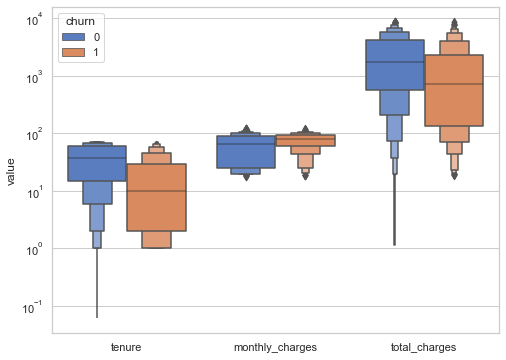

In [30]:
plot_all_continuous_vars(train_temp, 'churn', quant_vars)

In [57]:
# def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
#     cols = len(cat_vars)
#     for quant in quant_vars:
#         #_, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
#         _, ax = plt.subplots(nrows=2, ncols=int(cols/2), figsize=(16, 4), sharey=True)
#         for i, cat in enumerate(cat_vars):
#             sns.violinplot(x=cat, y=quant, data=train, split=True, 
#                            ax=ax[i], hue=target, palette="Set2")
#             ax[i].set_xlabel('')
#             ax[i].set_ylabel(quant)
#             ax[i].set_title(cat)
#         plt.show()
#         #plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees, I added this
#         # plt.tight_layout() # I added this

In [58]:
# sns.violinplot(x="gender", y='tenure', data=train_temp, split=True, hue='churn', palette="Set2")
# plt.show()

In [44]:
# for cat in cat_vars:
#     sns.violinplot(x=cat, y='tenure', data=train_temp, split=True, hue='churn', palette="Set2")
#     plt.show()

In [56]:
# cols = len(cat_vars)
# for quant in quant_vars:
#     _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(26, 10), sharey=True)
#     #_, ax = plt.subplots(nrows=2, ncols=int(cols/2), figsize=(16, 4), sharey=True)
#     for i, cat in enumerate(cat_vars):
#         sns.violinplot(x=cat, y=quant, data=train, split=True, 
#                        ax=ax[i], hue='churn', palette="Set2")
#         plt.xticks(rotation = 90)
#         ax[i].set_xlabel('')
#         ax[i].set_ylabel(quant)
#         ax[i].set_title(cat)
#     plt.show()

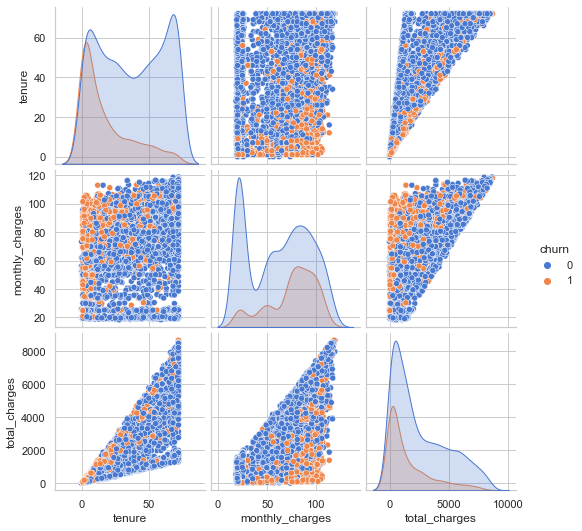

In [59]:
pair = sns.pairplot(data=train_temp, vars=quant_vars, hue="churn")
plt.show()